In [167]:
import numpy as np
import matplotlib.pyplot as plt
import wave
import scipy.signal as signal

In [168]:
file_path = ("../dane/nutki/A4(2).wav")
with wave.open(file_path, 'rb') as wav_file:
    n_channels = wav_file.getnchannels()
    sample_rate = wav_file.getframerate()
    n_frames = wav_file.getnframes()
    audio_duration = n_frames / sample_rate
    audio_data = np.frombuffer(wav_file.readframes(n_frames), dtype=np.int16)

    if n_channels == 2:
        audio_data = audio_data[::2]  # Convert stereo to mono



In [169]:
def smooth_signal(signal, window_size=5):
    """Apply a simple moving average filter."""
    window = np.ones(window_size) / window_size
    return np.convolve(signal, window, mode='same')
def amdf(signal):
    """Compute the Average Magnitude Difference Function (AMDF)."""
    N = len(signal)
    amdf_values = np.zeros(N)
    
    for tau in range(1, N):  # Start from 1 to avoid trivial min at tau=0
        amdf_values[tau] = np.sum(np.abs(signal[:N-tau] - signal[tau:N])) / (N - tau)
    
    return amdf_values
def find_average_minima_spacing(amdf_vals, num_minima=10, prominence=120):
    """
    Find the average spacing between significant minima in the AMDF.
    - num_minima: Number of minima to consider for averaging.
    - prominence: Controls how strong a minimum must be to be considered.
    """
    minima_indices, _ = signal.find_peaks(-amdf_vals, prominence=prominence)

    # Ensure we have enough minima
    if len(minima_indices) < 2:
        return None  # Not enough minima to estimate frequency
    # Use up to 'num_minima' minima for averaging
    selected_minima = minima_indices[:num_minima]
    
    # Compute differences between consecutive minima
    spacings = np.diff(selected_minima)

    # Compute the average spacing (period estimate)
    avg_period = np.mean(spacings)

    return avg_period

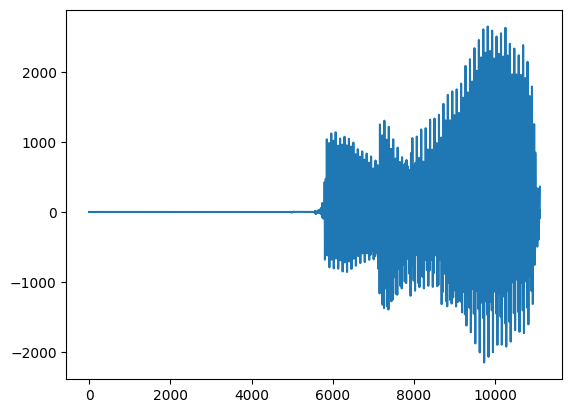

In [170]:
plt.plot(audio_data[:11100])

In [171]:
audio_data=audio_data[6000:]

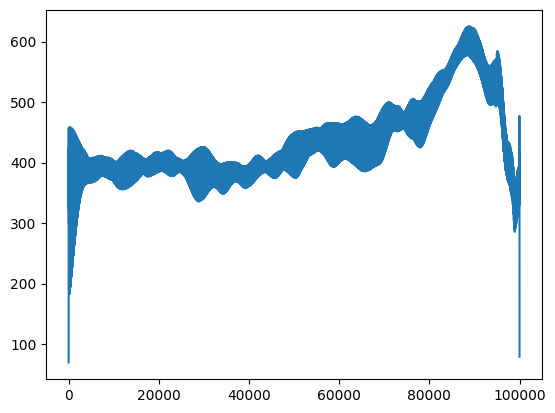

In [172]:
AMDF = amdf(audio_data[:100000])
AMDF = smooth_signal(AMDF,10)
plt.plot(AMDF)

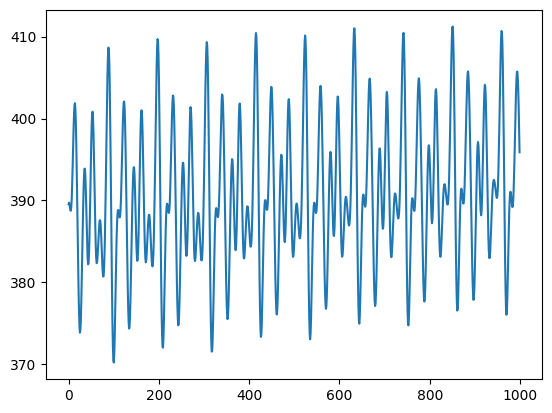

In [173]:
plt.plot(AMDF[6000:7000])

In [180]:

print(find_average_minima_spacing(AMDF[6000:7000], 10, 30))

108.71428571428571


In [176]:
np.max(AMDF[6000:7000])-np.min(AMDF[6000:7000])

np.float64(41.03159367535409)

In [177]:
def for_plotting(x):
    return find_average_minima_spacing(AMDF[6000:7000], 10, x)
for_plotting_vec = np.vectorize(for_plotting)

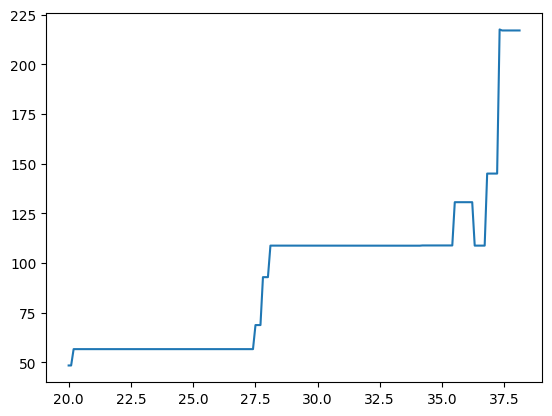

In [178]:
x = np.linspace(20, 120, 1000)
y = for_plotting_vec(x)
plt.plot(x, y)